In [1]:
import numpy as np
from dataclasses import dataclass
import json
import glob
from ase.calculators.calculator import Calculator
from sch_benchmark import Hutchison, IonicConformer, Rotamer, Tautomer
import sch_benchmark
import matplotlib.pyplot as plt
from xtb.ase.calculator import XTB
import ase


class FakeCalc(Calculator):

    def get_potential_energy(self, atoms, force_consistent=None):
        return 0.0

    def get_forces(self, atoms=None):
        return np.zeros((len(atoms), 3))

class XTBCmdCalculator(Calculator):

    def __init__(self, method='GFN2-xTB', **kwargs):
        self.method = method
        super().__init__(**kwargs)

    def calculate(self, atoms=None, properties=['energy', 'forces'], system_changes=all_changes):
        import subprocess
        from pathlib import Path
        import tempfile
        with tempfile.TemporaryDirectory() as tmpdir:
            tmp_path = Path(tmpdir)
            xyz_path = tmp_path / 'tmp.xyz'
            # write atoms to xyz file
            ase.io.write(str(xyz_path), atoms)
            charge = atoms.get_initial_charges().sum()
            if self.method == 'GFN2-xTB':
                gfn = "2"
            else:
                gfn = "1"
            cmd = f'xtb tmp.xyz --opt --gfn {gfn} --chrg {charge} --gfn {gfn} --grad >& tmp.log'
            subprocess.run(cmd, shell=True, cwd=tmp_path)
            # read output



/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):


In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "2"

  0%|          | 0/100 [00:00<?, ?it/s]/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/

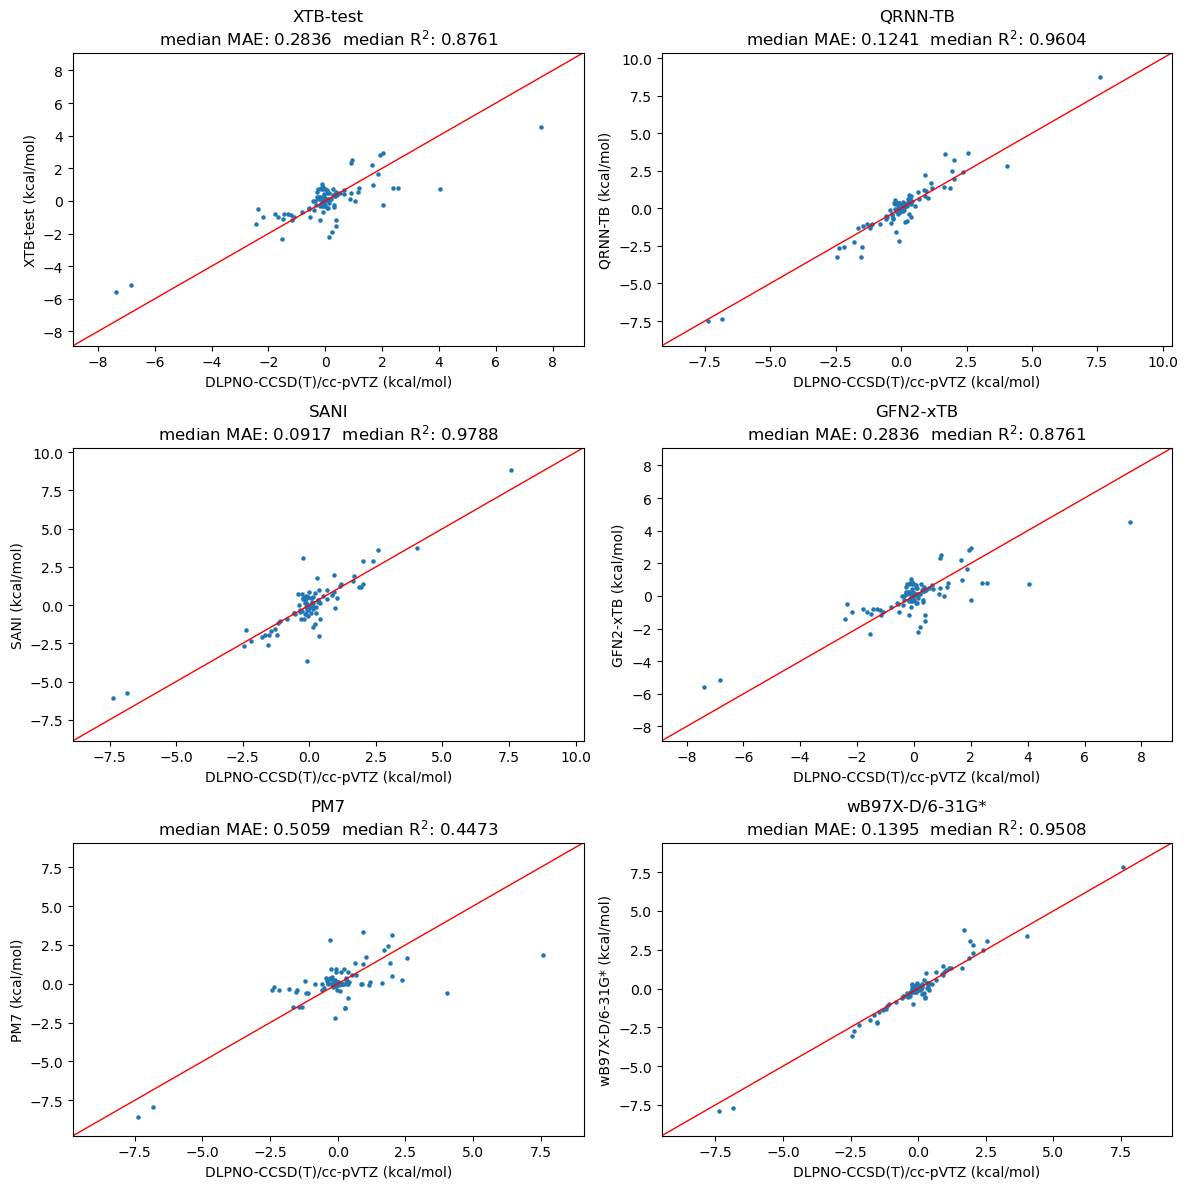

In [3]:
calc = XTB(method="GFN2-xTB")
hutchison = Hutchison()
hutchison.tasks = hutchison.tasks[:100]
hutchison.inference("XTB-test", calc, parallel=True)

hutchison.analyse(methods=["XTB-test", "QRNN-TB", "SANI", "GFN2-xTB", "PM7", "wB97X-D/6-31G*"])

  0%|          | 0/50 [00:00<?, ?it/s]/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/U

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:03:48    -1170.178969*       0.6803
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:03:48    -1170.096130*       0.6338
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:03:48    -1170.136398*       0.6669
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:03:48    -1170.029681*       0.6188
BFGSLineSearch:    1[  2] 14:03:48    -1170.200804*       0.3721
BFGSLineSearch:    1[  2] 14:03:48    -1170.052470*       0.5767
BFGSLineSearch:    1[  2] 14:03:48    -1170.121405*       0.5045
BFGSLineSearch:    1[  2] 14:03:48    -1170.155991*       0.3587
BFGSLineSearch:    2[  4

  2%|▏         | 1/50 [00:08<06:48,  8.35s/it]

BFGSLineSearch:   90[154] 14:03:55    -1170.229972*       0.0018
BFGSLineSearch:   86[140] 14:03:55    -1170.235025*       0.1000
BFGSLineSearch:  104[161] 14:03:55    -1170.269681*       0.0015
BFGSLineSearch:   76[134] 14:03:55    -1170.306869*       0.0171
BFGSLineSearch:   87[141] 14:03:55    -1170.237466*       0.0945
BFGSLineSearch:   91[156] 14:03:55    -1170.229973*       0.0021
BFGSLineSearch:  105[163] 14:03:55    -1170.269682*       0.0021
BFGSLineSearch:   92[157] 14:03:55    -1170.229973*       0.0008
BFGSLineSearch:   77[136] 14:03:55    -1170.307041*       0.0325
BFGSLineSearch:   88[142] 14:03:55    -1170.240480*       0.1584
BFGSLineSearch:  106[165] 14:03:55    -1170.269687*       0.0036
BFGSLineSearch:  107[166] 14:03:55    -1170.269690*       0.0014
BFGSLineSearch:   78[138] 14:03:55    -1170.307153*       0.0244
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:03:55    -11

  6%|▌         | 3/50 [00:14<03:33,  4.54s/it]

BFGSLineSearch:   88[142] 14:04:01    -1170.301787*       0.0326
BFGSLineSearch:   47[ 90] 14:04:01    -1170.349276*       0.0248
BFGSLineSearch:   89[143] 14:04:01    -1170.301925*       0.0222
BFGSLineSearch:  226[317] 14:04:01    -1170.331101*       0.0036
BFGSLineSearch:   48[ 91] 14:04:01    -1170.349414*       0.0140
BFGSLineSearch:  227[318] 14:04:01    -1170.331103*       0.0028
BFGSLineSearch:   95[156] 14:04:01    -1170.394756*       0.0120
BFGSLineSearch:   90[144] 14:04:01    -1170.302055*       0.0144
BFGSLineSearch:  228[319] 14:04:01    -1170.331105*       0.0026
BFGSLineSearch:   49[ 93] 14:04:02    -1170.349471*       0.0343
BFGSLineSearch:  229[320] 14:04:02    -1170.331105*       0.0018
BFGSLineSearch:   91[145] 14:04:02    -1170.302168*       0.0135
BFGSLineSearch:  230[321] 14:04:02    -1170.331106*       0.0010
BFGSLineSearch:   96[158] 14:04:02    -1170.394760*       0.0033
BFGSLineSearch:  231[322] 14:04:02    -1170.331106*       0.0007
BFGSLineSearch:   92[146]

 10%|█         | 5/50 [00:16<02:01,  2.70s/it]

BFGSLineSearch:  123[199] 14:04:03    -1170.304225*       0.0075
BFGSLineSearch:  124[200] 14:04:03    -1170.304231*       0.0027
BFGSLineSearch:   86[143] 14:04:03    -1170.355845*       0.0133
BFGSLineSearch:   16[ 32] 14:04:03    -1170.278827*       0.0758
BFGSLineSearch:    5[ 10] 14:04:03    -1170.268906*       0.2692
BFGSLineSearch:  125[201] 14:04:03    -1170.304234*       0.0016
BFGSLineSearch:   87[144] 14:04:03    -1170.355897*       0.0079
BFGSLineSearch:  126[202] 14:04:03    -1170.304235*       0.0010
BFGSLineSearch:   88[145] 14:04:03    -1170.355953*       0.0097
BFGSLineSearch:  127[203] 14:04:03    -1170.304235*       0.0009
BFGSLineSearch:   17[ 34] 14:04:04    -1170.279456*       0.0732
BFGSLineSearch:   89[147] 14:04:04    -1170.356024*       0.0216
BFGSLineSearch:    6[ 12] 14:04:04    -1170.273493*       0.1973
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:04    -11

 14%|█▍        | 7/50 [00:18<01:22,  1.93s/it]

BFGSLineSearch:  122[191] 14:04:05    -1170.358790*       0.0024
BFGSLineSearch:   14[ 28] 14:04:05    -1170.291311*       0.0876
BFGSLineSearch:   36[ 70] 14:04:05    -1170.289353*       0.0525
BFGSLineSearch:  123[192] 14:04:05    -1170.358791*       0.0015
BFGSLineSearch:   22[ 44] 14:04:05    -1170.304826*       0.0738
BFGSLineSearch:   37[ 71] 14:04:05    -1170.289670*       0.0795
BFGSLineSearch:  124[193] 14:04:05    -1170.358792*       0.0012
BFGSLineSearch:  125[194] 14:04:05    -1170.358793*       0.0014
BFGSLineSearch:   15[ 30] 14:04:05    -1170.292385*       0.0689
BFGSLineSearch:   23[ 46] 14:04:05    -1170.305282*       0.0645
BFGSLineSearch:  126[195] 14:04:05    -1170.358793*       0.0014
BFGSLineSearch:   38[ 73] 14:04:05    -1170.290185*       0.0378
BFGSLineSearch:  127[196] 14:04:05    -1170.358794*       0.0010
BFGSLineSearch:   39[ 74] 14:04:05    -1170.290470*       0.0556
BFGSLineSearch:   16[ 32] 14:04:05    -1170.293227*       0.0793
BFGSLineSearch:   24[ 48]

 16%|█▌        | 8/50 [00:21<01:27,  2.08s/it]

BFGSLineSearch:   55[105] 14:04:08    -1170.345566*       0.4616
BFGSLineSearch:   86[150] 14:04:08    -1170.295334*       0.0027
BFGSLineSearch:   87[152] 14:04:08    -1170.295335*       0.0017
BFGSLineSearch:   48[ 91] 14:04:08    -1170.315461*       0.2929
BFGSLineSearch:   17[ 34] 14:04:08    -1514.929391*       0.0309
BFGSLineSearch:   56[107] 14:04:08    -1170.350965*       0.1865
BFGSLineSearch:   88[154] 14:04:08    -1170.295336*       0.0010
BFGSLineSearch:   49[ 93] 14:04:08    -1170.316957*       0.1204
BFGSLineSearch:   57[109] 14:04:08    -1170.355599*       0.2009
BFGSLineSearch:   18[ 36] 14:04:08    -1514.929624*       0.0341
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:08    -1514.425956*       1.3986
BFGSLineSearch:   50[ 95] 14:04:08    -1170.319267*       0.2679
BFGSLineSearch:   58[110] 14:04:08    -1170.359010*       0.3127
BFGSLineSearch:   19[ 38] 14:04:08    -15

 18%|█▊        | 9/50 [00:24<01:37,  2.38s/it]

BFGSLineSearch:  109[182] 14:04:11    -1170.393572*       0.0035
BFGSLineSearch:   19[ 38] 14:04:11    -1514.566094*       0.0788
BFGSLineSearch:  117[203] 14:04:11    -1170.399714*       0.0034
BFGSLineSearch:  110[184] 14:04:11    -1170.393576*       0.0044
BFGSLineSearch:  118[204] 14:04:11    -1170.399718*       0.0021
BFGSLineSearch:   50[ 95] 14:04:11    -1514.931592*       0.0120
BFGSLineSearch:  119[205] 14:04:11    -1170.399719*       0.0012
BFGSLineSearch:  111[186] 14:04:11    -1170.393579*       0.0028
BFGSLineSearch:  120[206] 14:04:11    -1170.399719*       0.0004
BFGSLineSearch:   51[ 96] 14:04:11    -1514.931649*       0.0109
BFGSLineSearch:  112[188] 14:04:11    -1170.393581*       0.0015
BFGSLineSearch:   20[ 40] 14:04:11    -1514.566752*       0.0747
BFGSLineSearch:  113[189] 14:04:11    -1170.393582*       0.0007
BFGSLineSearch:   52[ 98] 14:04:11    -1514.931669*       0.0142
                Step[ FC]     Time          Energy          fmax
*Force-consistent energie

 22%|██▏       | 11/50 [00:29<01:38,  2.54s/it]

BFGSLineSearch:   46[ 89] 14:04:17    -1514.839312*       0.0427
BFGSLineSearch:   49[ 96] 14:04:17    -1514.960710*       0.0083
BFGSLineSearch:  107[226] 14:04:17    -1514.933737*       0.0009
BFGSLineSearch:   78[135] 14:04:17    -1514.584294*       0.0034
BFGSLineSearch:   50[ 97] 14:04:17    -1514.960745*       0.0078
BFGSLineSearch:   47[ 91] 14:04:17    -1514.839567*       0.0411
BFGSLineSearch:   79[137] 14:04:17    -1514.584303*       0.0053
BFGSLineSearch:   51[ 99] 14:04:17    -1514.960759*       0.0201
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:17    -1514.713646*       1.3790
BFGSLineSearch:   80[138] 14:04:17    -1514.584309*       0.0027
BFGSLineSearch:   52[100] 14:04:17    -1514.960786*       0.0133
BFGSLineSearch:   48[ 93] 14:04:17    -1514.839905*       0.0342
BFGSLineSearch:   53[101] 14:04:17    -1514.960817*       0.0204
BFGSLineSearch:   81[139] 14:04:17    -15

 24%|██▍       | 12/50 [00:31<01:32,  2.44s/it]

BFGSLineSearch:   80[142] 14:04:19    -1514.962179*       0.0059
BFGSLineSearch:  100[178] 14:04:19    -1514.584438*       0.0035
BFGSLineSearch:   73[126] 14:04:19    -1514.855541*       0.0256
BFGSLineSearch:   81[143] 14:04:19    -1514.962207*       0.0057
BFGSLineSearch:  101[179] 14:04:19    -1514.584441*       0.0006
BFGSLineSearch:   14[ 28] 14:04:19    -1514.822318*       0.0574
BFGSLineSearch:   82[145] 14:04:19    -1514.962245*       0.0065
BFGSLineSearch:   74[128] 14:04:19    -1514.855839*       0.0272
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:19    -1514.831013*       1.3909
BFGSLineSearch:   83[147] 14:04:19    -1514.962271*       0.0051
BFGSLineSearch:   75[129] 14:04:19    -1514.856077*       0.0215
BFGSLineSearch:   15[ 30] 14:04:19    -1514.822768*       0.0452
BFGSLineSearch:   76[130] 14:04:19    -1514.856419*       0.0370
BFGSLineSearch:   84[149] 14:04:19    -15

 26%|██▌       | 13/50 [00:32<01:16,  2.08s/it]

BFGSLineSearch:   93[166] 14:04:20    -1514.962331*       0.0052
BFGSLineSearch:   89[144] 14:04:20    -1514.858798*       0.0149
BFGSLineSearch:    5[ 10] 14:04:20    -1514.929988*       0.1728
BFGSLineSearch:   90[145] 14:04:20    -1514.858882*       0.0123
BFGSLineSearch:   94[168] 14:04:20    -1514.962337*       0.0028
BFGSLineSearch:   22[ 44] 14:04:20    -1514.827861*       0.0962
BFGSLineSearch:   95[169] 14:04:20    -1514.962338*       0.0012
BFGSLineSearch:   96[170] 14:04:20    -1514.962339*       0.0009
BFGSLineSearch:    6[ 12] 14:04:20    -1514.934260*       0.1469
BFGSLineSearch:   91[147] 14:04:20    -1514.858982*       0.0235
BFGSLineSearch:   23[ 46] 14:04:20    -1514.829488*       0.0862
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:20    -1514.714932*       1.3773
BFGSLineSearch:   92[149] 14:04:20    -1514.859090*       0.0271
BFGSLineSearch:    7[ 14] 14:04:20    -15

 28%|██▊       | 14/50 [00:36<01:30,  2.51s/it]

BFGSLineSearch:   27[ 54] 14:04:23    -1514.833630*       0.0502
BFGSLineSearch:   60[110] 14:04:23    -1514.849419*       0.0569
BFGSLineSearch:   38[ 76] 14:04:23    -1514.960039*       0.0337
BFGSLineSearch:  123[252] 14:04:23    -1514.859718*       0.0009
BFGSLineSearch:   28[ 56] 14:04:24    -1514.834110*       0.0535
BFGSLineSearch:   39[ 78] 14:04:24    -1514.960251*       0.0245
BFGSLineSearch:   61[112] 14:04:24    -1514.849923*       0.1031
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:24    -1514.830341*       1.3919
BFGSLineSearch:   40[ 80] 14:04:24    -1514.960327*       0.0158
BFGSLineSearch:   29[ 58] 14:04:24    -1514.834792*       0.0812
BFGSLineSearch:   62[114] 14:04:24    -1514.850789*       0.0613
BFGSLineSearch:   63[115] 14:04:24    -1514.851472*       0.0368
BFGSLineSearch:   41[ 82] 14:04:24    -1514.960411*       0.0144
BFGSLineSearch:   64[116] 14:04:24    -15

 30%|███       | 15/50 [00:41<01:48,  3.11s/it]

BFGSLineSearch:   83[137] 14:04:28    -1514.858109*       0.0144
BFGSLineSearch:  123[218] 14:04:28    -1514.859718*       0.0007
BFGSLineSearch:   84[138] 14:04:28    -1514.858242*       0.0126
BFGSLineSearch:   38[ 76] 14:04:28    -1514.959849*       0.0352
BFGSLineSearch:   85[139] 14:04:28    -1514.858339*       0.0114
BFGSLineSearch:    3[  6] 14:04:28    -1514.907323*       0.2146
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:28    -1514.669825*       1.3803
BFGSLineSearch:   86[140] 14:04:28    -1514.858426*       0.0213
BFGSLineSearch:   39[ 78] 14:04:28    -1514.960063*       0.0253
BFGSLineSearch:   87[141] 14:04:28    -1514.858520*       0.0208
BFGSLineSearch:   88[142] 14:04:28    -1514.858631*       0.0179
BFGSLineSearch:    4[  8] 14:04:28    -1514.911856*       0.2310
BFGSLineSearch:   40[ 80] 14:04:28    -1514.960140*       0.0160
BFGSLineSearch:   89[143] 14:04:28    -15

 34%|███▍      | 17/50 [00:44<01:21,  2.47s/it]

BFGSLineSearch:  116[216] 14:04:31    -1514.859710*       0.0025
BFGSLineSearch:   80[139] 14:04:31    -1514.962166*       0.0072
BFGSLineSearch:   22[ 44] 14:04:31    -1514.793473*       0.1225
BFGSLineSearch:   81[140] 14:04:31    -1514.962198*       0.0064
BFGSLineSearch:  117[218] 14:04:31    -1514.859713*       0.0030
BFGSLineSearch:   26[ 52] 14:04:31    -1514.931212*       0.0199
BFGSLineSearch:  118[219] 14:04:31    -1514.859715*       0.0023
BFGSLineSearch:   82[142] 14:04:31    -1514.962232*       0.0064
BFGSLineSearch:  119[220] 14:04:31    -1514.859716*       0.0011
BFGSLineSearch:   23[ 46] 14:04:31    -1514.794769*       0.1160
BFGSLineSearch:  120[221] 14:04:31    -1514.859716*       0.0010
BFGSLineSearch:   27[ 54] 14:04:31    -1514.931267*       0.0157
BFGSLineSearch:   83[144] 14:04:31    -1514.962276*       0.0090
BFGSLineSearch:   84[145] 14:04:32    -1514.962286*       0.0032
BFGSLineSearch:   24[ 48] 14:04:32    -1514.795995*       0.0760
                Step[ FC]

 36%|███▌      | 18/50 [00:45<01:05,  2.05s/it]

BFGSLineSearch:   96[161] 14:04:32    -1514.962342*       0.0016
BFGSLineSearch:   33[ 66] 14:04:32    -1514.931730*       0.0161
BFGSLineSearch:    4[  8] 14:04:32    -1609.736242*       0.2029
BFGSLineSearch:   97[162] 14:04:32    -1514.962343*       0.0010
BFGSLineSearch:   30[ 60] 14:04:32    -1514.801089*       0.0461
BFGSLineSearch:   34[ 68] 14:04:32    -1514.931769*       0.0172
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:32    -1610.315360*       0.7913
BFGSLineSearch:    5[ 10] 14:04:32    -1609.739802*       0.2261
BFGSLineSearch:   31[ 62] 14:04:32    -1514.801648*       0.0532
BFGSLineSearch:   35[ 70] 14:04:32    -1514.931813*       0.0118
BFGSLineSearch:    6[ 12] 14:04:32    -1609.742151*       0.2030
BFGSLineSearch:    1[  2] 14:04:32    -1610.352507*       0.8263
BFGSLineSearch:   32[ 64] 14:04:32    -1514.802139*       0.0391
BFGSLineSearch:   36[ 72] 14:04:32    -15

 38%|███▊      | 19/50 [00:50<01:31,  2.94s/it]

BFGSLineSearch:  104[184] 14:04:38    -1514.933736*       0.0016
BFGSLineSearch:   58[111] 14:04:38    -1610.401788*       0.0107
BFGSLineSearch:   61[119] 14:04:38    -1609.790612*       0.0164
BFGSLineSearch:    8[ 16] 14:04:38    -1610.434499*       0.0520
BFGSLineSearch:   59[113] 14:04:38    -1610.401801*       0.0083
BFGSLineSearch:  105[189] 14:04:38    -1514.933736*       0.0009
BFGSLineSearch:   62[121] 14:04:38    -1609.790663*       0.0208
BFGSLineSearch:   60[115] 14:04:38    -1610.401817*       0.0043
BFGSLineSearch:    9[ 18] 14:04:38    -1610.435533*       0.0996
BFGSLineSearch:   61[116] 14:04:38    -1610.401830*       0.0084
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:38    -1610.183335*       0.8180
BFGSLineSearch:   63[123] 14:04:38    -1609.790696*       0.0078
BFGSLineSearch:   64[124] 14:04:38    -1609.790738*       0.0116
BFGSLineSearch:   62[118] 14:04:38    -16

 42%|████▏     | 21/50 [00:54<01:11,  2.46s/it]

BFGSLineSearch:  112[209] 14:04:41    -1609.791856*       0.0019
BFGSLineSearch:   47[ 93] 14:04:41    -1610.448703*       0.0135
BFGSLineSearch:   32[ 63] 14:04:41    -1610.284701*       0.0429
BFGSLineSearch:  117[202] 14:04:41    -1610.402859*       0.0042
BFGSLineSearch:  113[211] 14:04:41    -1609.791860*       0.0019
BFGSLineSearch:   48[ 95] 14:04:41    -1610.448753*       0.0114
BFGSLineSearch:  118[204] 14:04:41    -1610.402864*       0.0042
BFGSLineSearch:  114[213] 14:04:41    -1609.791861*       0.0012
BFGSLineSearch:   33[ 65] 14:04:41    -1610.285123*       0.0341
BFGSLineSearch:   49[ 97] 14:04:41    -1610.448786*       0.0106
BFGSLineSearch:  115[215] 14:04:41    -1609.791862*       0.0007
BFGSLineSearch:  119[206] 14:04:41    -1610.402875*       0.0094
BFGSLineSearch:   34[ 67] 14:04:41    -1610.285396*       0.0325
BFGSLineSearch:   50[ 99] 14:04:41    -1610.448821*       0.0154
BFGSLineSearch:  120[208] 14:04:41    -1610.402890*       0.0041
                Step[ FC]

 44%|████▍     | 22/50 [00:56<01:03,  2.26s/it]

BFGSLineSearch:  148[244] 14:04:43    -1610.403117*       0.0023
BFGSLineSearch:   52[102] 14:04:43    -1610.288328*       0.0541
BFGSLineSearch:  149[245] 14:04:43    -1610.403117*       0.0022
BFGSLineSearch:   13[ 26] 14:04:43    -1610.075188*       0.0657
BFGSLineSearch:   73[136] 14:04:43    -1610.449888*       0.0093
BFGSLineSearch:  150[247] 14:04:43    -1610.403118*       0.0010
BFGSLineSearch:   53[104] 14:04:43    -1610.288499*       0.0196
BFGSLineSearch:   14[ 28] 14:04:43    -1610.076090*       0.0841
BFGSLineSearch:   74[138] 14:04:43    -1610.449996*       0.0115
BFGSLineSearch:   54[105] 14:04:43    -1610.288649*       0.0354
BFGSLineSearch:   75[139] 14:04:43    -1610.450068*       0.0081
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:43    -1610.362752*       0.8042
BFGSLineSearch:   76[140] 14:04:43    -1610.450172*       0.0068
BFGSLineSearch:   15[ 30] 14:04:43    -16

 46%|████▌     | 23/50 [00:57<00:52,  1.95s/it]

BFGSLineSearch:   67[126] 14:04:44    -1610.290464*       0.0369
BFGSLineSearch:   93[163] 14:04:44    -1610.450603*       0.0010
BFGSLineSearch:   68[127] 14:04:44    -1610.290686*       0.0210
BFGSLineSearch:    8[ 16] 14:04:44    -1610.434394*       0.0525
BFGSLineSearch:   69[128] 14:04:44    -1610.290870*       0.0202
BFGSLineSearch:   25[ 50] 14:04:44    -1610.084483*       0.0348
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:44    -1609.770522*       0.8069
BFGSLineSearch:    9[ 18] 14:04:44    -1610.435429*       0.1000
BFGSLineSearch:   70[130] 14:04:44    -1610.290973*       0.0404
BFGSLineSearch:   26[ 52] 14:04:44    -1610.084884*       0.0459
BFGSLineSearch:   71[131] 14:04:44    -1610.291221*       0.0212
BFGSLineSearch:    1[  2] 14:04:44    -1609.803724*       0.6296
BFGSLineSearch:   27[ 54] 14:04:44    -1610.085295*       0.0400
BFGSLineSearch:   10[ 20] 14:04:44    -16

 48%|████▊     | 24/50 [01:02<01:11,  2.76s/it]

BFGSLineSearch:   92[166] 14:04:49    -1610.092407*       0.0062
BFGSLineSearch:   68[128] 14:04:49    -1610.449535*       0.0093
BFGSLineSearch:   69[129] 14:04:49    -1610.449583*       0.0090
BFGSLineSearch:  150[251] 14:04:49    -1610.295339*       0.0087
BFGSLineSearch:   93[168] 14:04:49    -1610.092481*       0.0072
BFGSLineSearch:   52[103] 14:04:49    -1609.845346*       0.0241
BFGSLineSearch:  151[252] 14:04:49    -1610.295346*       0.0037
BFGSLineSearch:   70[131] 14:04:49    -1610.449606*       0.0150
BFGSLineSearch:  152[253] 14:04:49    -1610.295348*       0.0008
BFGSLineSearch:   53[105] 14:04:49    -1609.845394*       0.0121
BFGSLineSearch:   94[170] 14:04:49    -1610.092532*       0.0076
BFGSLineSearch:   71[132] 14:04:49    -1610.449673*       0.0116
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:49    -1609.996869*       0.7824
BFGSLineSearch:   72[134] 14:04:49    -16

 50%|█████     | 25/50 [01:10<01:44,  4.19s/it]

BFGSLineSearch:  224[340] 14:04:57    -1610.295609*       0.0022
BFGSLineSearch:   20[ 40] 14:04:57    -1029.881019*       0.0464
BFGSLineSearch:   78[142] 14:04:57    -1610.444545*       0.0049
BFGSLineSearch:  225[341] 14:04:57    -1610.295609*       0.0013
BFGSLineSearch:   32[ 63] 14:04:57    -1610.143375*       0.0205
BFGSLineSearch:   21[ 42] 14:04:57    -1029.881300*       0.0509
BFGSLineSearch:  226[342] 14:04:57    -1610.295610*       0.0010
BFGSLineSearch:   79[143] 14:04:57    -1610.444583*       0.0050
BFGSLineSearch:   33[ 64] 14:04:57    -1610.143542*       0.0358
BFGSLineSearch:  227[343] 14:04:57    -1610.295610*       0.0008
BFGSLineSearch:   22[ 44] 14:04:57    -1029.881537*       0.0320
BFGSLineSearch:   80[144] 14:04:57    -1610.444624*       0.0058
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:57    -1031.298953*       0.9911
BFGSLineSearch:   23[ 46] 14:04:57    -10

 58%|█████▊    | 29/50 [01:10<00:36,  1.74s/it]

BFGSLineSearch:   87[158] 14:04:58    -1610.444866*       0.0028
BFGSLineSearch:   42[ 76] 14:04:58    -1029.884326*       0.0499
BFGSLineSearch:   11[ 22] 14:04:58    -1031.387228*       0.1368
BFGSLineSearch:   43[ 77] 14:04:58    -1029.884501*       0.0270
BFGSLineSearch:   88[159] 14:04:58    -1610.444870*       0.0014
BFGSLineSearch:   44[ 78] 14:04:58    -1029.884646*       0.0119
BFGSLineSearch:   40[ 78] 14:04:58    -1610.144395*       0.0191
BFGSLineSearch:   12[ 24] 14:04:58    -1031.389316*       0.1340
BFGSLineSearch:   45[ 80] 14:04:58    -1029.884775*       0.0173
BFGSLineSearch:   89[160] 14:04:58    -1610.444872*       0.0008
BFGSLineSearch:   46[ 82] 14:04:58    -1029.884883*       0.0183
BFGSLineSearch:   13[ 26] 14:04:58    -1031.391206*       0.1935
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:04:58    -1031.377926*       1.0355
BFGSLineSearch:   47[ 83] 14:04:58    -10

 60%|██████    | 30/50 [01:14<00:43,  2.17s/it]

BFGSLineSearch:  101[184] 14:05:02    -1610.147283*       0.0007
BFGSLineSearch:    9[ 18] 14:05:02    -2634.507074*       0.1780
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:05:02    -2634.397916*       0.8600
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:05:02    -2634.552249*       0.7987
BFGSLineSearch:   10[ 20] 14:05:02    -2634.765834*       0.1158
BFGSLineSearch:   10[ 20] 14:05:02    -2634.512127*       0.1537
BFGSLineSearch:   11[ 22] 14:05:02    -2634.769336*       0.1476
BFGSLineSearch:    1[  2] 14:05:02    -2634.455644*       0.8260
BFGSLineSearch:    1[  2] 14:05:02    -2634.602676*       0.7319
BFGSLineSearch:   11[ 22] 14:05:02    -2634.516900*       0.1638
BFGSLineSearch:   12[ 24] 14:05:03    -2634.772564*       0.1863
BFGSLineSearch:    2[  4] 14:05:03    -2634.480086*      

 68%|██████▊   | 34/50 [01:48<01:25,  5.32s/it]

BFGSLineSearch:  191[302] 14:05:35    -2634.786905*       0.0303
BFGSLineSearch:  163[274] 14:05:35    -2634.797506*       0.0190
BFGSLineSearch:  195[329] 14:05:35    -2634.926893*       0.0033
BFGSLineSearch:  188[307] 14:05:35    -2634.743320*       0.0094
BFGSLineSearch:  196[330] 14:05:35    -2634.926895*       0.0012
BFGSLineSearch:  192[303] 14:05:35    -2634.787516*       0.0272
BFGSLineSearch:  164[275] 14:05:35    -2634.797660*       0.0197
BFGSLineSearch:  189[308] 14:05:35    -2634.743337*       0.0035
BFGSLineSearch:  197[331] 14:05:35    -2634.926897*       0.0009
BFGSLineSearch:  165[276] 14:05:35    -2634.797830*       0.0211
BFGSLineSearch:  193[304] 14:05:35    -2634.787978*       0.0266
BFGSLineSearch:  190[309] 14:05:35    -2634.743351*       0.0049
BFGSLineSearch:  166[277] 14:05:36    -2634.798042*       0.0220
BFGSLineSearch:  194[305] 14:05:36    -2634.788482*       0.0242
BFGSLineSearch:  191[310] 14:05:36    -2634.743358*       0.0019
                Step[ FC]

 70%|███████   | 35/50 [01:58<01:29,  5.98s/it]

BFGSLineSearch:   34[ 68] 14:05:45    -2634.775849*       0.0446
BFGSLineSearch:  278[399] 14:05:45    -2634.801722*       0.0009
BFGSLineSearch:  248[406] 14:05:45    -2634.750669*       0.0337
BFGSLineSearch:  235[381] 14:05:45    -2634.805380*       0.0028
BFGSLineSearch:  249[407] 14:05:45    -2634.751138*       0.0256
BFGSLineSearch:   35[ 70] 14:05:45    -2634.776527*       0.0468
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:05:45    -2634.743045*       0.8501
BFGSLineSearch:  236[383] 14:05:45    -2634.805386*       0.0040
BFGSLineSearch:  250[408] 14:05:45    -2634.751386*       0.0231
BFGSLineSearch:  251[409] 14:05:45    -2634.751535*       0.0181
BFGSLineSearch:  237[385] 14:05:45    -2634.805390*       0.0027
BFGSLineSearch:   36[ 72] 14:05:46    -2634.777352*       0.0463
BFGSLineSearch:  252[410] 14:05:46    -2634.751625*       0.0158
BFGSLineSearch:    1[  2] 14:05:46    -26

 72%|███████▏  | 36/50 [02:03<01:22,  5.88s/it]

BFGSLineSearch:  269[444] 14:05:50    -2634.805772*       0.0006
BFGSLineSearch:   59[116] 14:05:51    -2634.795521*       0.0428
BFGSLineSearch:   19[ 38] 14:05:51    -2634.900809*       0.1177
BFGSLineSearch:    3[  6] 14:05:51    -2634.624137*       0.3735
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:05:51    -2634.428687*       0.8217
BFGSLineSearch:   60[118] 14:05:51    -2634.796100*       0.0521
BFGSLineSearch:   20[ 40] 14:05:51    -2634.902431*       0.0853
BFGSLineSearch:    4[  8] 14:05:51    -2634.637596*       0.3318
BFGSLineSearch:    1[  2] 14:05:51    -2634.483884*       0.7132
BFGSLineSearch:   61[120] 14:05:51    -2634.796645*       0.0385
BFGSLineSearch:   21[ 42] 14:05:51    -2634.903499*       0.0651
BFGSLineSearch:    5[ 10] 14:05:51    -2634.645981*       0.4080
BFGSLineSearch:   62[122] 14:05:51    -2634.797249*       0.0483
BFGSLineSearch:    2[  4] 14:05:51    -26

 76%|███████▌  | 38/50 [02:29<01:38,  8.19s/it]

BFGSLineSearch:  100[197] 14:06:16    -2634.773977*       0.0811
BFGSLineSearch:  230[364] 14:06:16    -2634.836869*       0.0029
BFGSLineSearch:  120[221] 14:06:16    -2634.772497*       0.0224
BFGSLineSearch:  154[262] 14:06:16    -2634.997402*       0.0127
BFGSLineSearch:  231[365] 14:06:16    -2634.836869*       0.0008
BFGSLineSearch:  121[222] 14:06:16    -2634.772756*       0.0171
BFGSLineSearch:  155[263] 14:06:16    -2634.997438*       0.0053
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:06:16    -1150.253697*       1.1292
BFGSLineSearch:  101[199] 14:06:16    -2634.775165*       0.0666
BFGSLineSearch:  156[264] 14:06:16    -2634.997469*       0.0043
BFGSLineSearch:  122[223] 14:06:16    -2634.773070*       0.0146
BFGSLineSearch:    1[  2] 14:06:16    -1150.308540*       0.6119
BFGSLineSearch:  157[265] 14:06:16    -2634.997493*       0.0057
BFGSLineSearch:  123[224] 14:06:16    -26

 78%|███████▊  | 39/50 [02:30<01:15,  6.91s/it]

BFGSLineSearch:  138[239] 14:06:17    -2634.775179*       0.0173
BFGSLineSearch:  174[282] 14:06:17    -2634.997615*       0.0008
BFGSLineSearch:  110[212] 14:06:18    -2634.786989*       0.0492
BFGSLineSearch:   15[ 30] 14:06:18    -1150.402852*       0.0837
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:06:18    -1150.336236*       0.8910
BFGSLineSearch:  139[240] 14:06:18    -2634.775328*       0.0241
BFGSLineSearch:   16[ 32] 14:06:18    -1150.404845*       0.1079
BFGSLineSearch:  140[241] 14:06:18    -2634.775482*       0.0137
BFGSLineSearch:    1[  2] 14:06:18    -1150.388170*       0.5924
BFGSLineSearch:   17[ 34] 14:06:18    -1150.406544*       0.0928
BFGSLineSearch:  111[214] 14:06:18    -2634.788017*       0.0770
BFGSLineSearch:  141[242] 14:06:18    -2634.775590*       0.0074
BFGSLineSearch:    2[  4] 14:06:18    -1150.403666*       0.3467
BFGSLineSearch:   18[ 36] 14:06:18    -11

 80%|████████  | 40/50 [02:41<01:18,  7.80s/it]

BFGSLineSearch:  199[321] 14:06:28    -2634.823088*       0.0049
BFGSLineSearch:   22[ 44] 14:06:28    -1150.618387*       0.0440
BFGSLineSearch:  226[362] 14:06:29    -2634.777553*       0.0009
BFGSLineSearch:   36[ 69] 14:06:29    -1150.699125*       0.0219
BFGSLineSearch:  200[322] 14:06:29    -2634.823108*       0.0045
BFGSLineSearch:   23[ 46] 14:06:29    -1150.618762*       0.0401
BFGSLineSearch:   37[ 71] 14:06:29    -1150.699217*       0.0157
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:06:29    -1150.271524*       0.8774
BFGSLineSearch:   38[ 72] 14:06:29    -1150.699304*       0.0581
BFGSLineSearch:   24[ 48] 14:06:29    -1150.619080*       0.0460
BFGSLineSearch:   39[ 74] 14:06:29    -1150.699397*       0.0207
BFGSLineSearch:    1[  2] 14:06:29    -1150.322768*       0.5678
BFGSLineSearch:  201[324] 14:06:29    -2634.823141*       0.0095
BFGSLineSearch:   25[ 50] 14:06:29    -11

 82%|████████▏ | 41/50 [02:47<01:06,  7.41s/it]

BFGSLineSearch:  243[390] 14:06:35    -2634.823809*       0.0010
BFGSLineSearch:   69[120] 14:06:35    -1150.437470*       0.0247
BFGSLineSearch:   70[121] 14:06:35    -1150.437718*       0.0260
BFGSLineSearch:   43[ 83] 14:06:35    -1150.637322*       0.0449
BFGSLineSearch:   13[ 26] 14:06:35    -1681.756618*       0.0657
BFGSLineSearch:   71[122] 14:06:35    -1150.437927*       0.0297
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:06:35    -1681.865711*       0.7881
BFGSLineSearch:   72[123] 14:06:35    -1150.438169*       0.0326
BFGSLineSearch:   44[ 85] 14:06:35    -1150.637579*       0.0286
BFGSLineSearch:   45[ 86] 14:06:35    -1150.638058*       0.0576
BFGSLineSearch:   73[125] 14:06:35    -1150.438590*       0.0367
BFGSLineSearch:   14[ 28] 14:06:35    -1681.757200*       0.0605
BFGSLineSearch:   46[ 88] 14:06:35    -1150.638211*       0.0191
BFGSLineSearch:   74[127] 14:06:35    -11

 94%|█████████▍| 47/50 [02:49<00:07,  2.65s/it]

BFGSLineSearch:   98[163] 14:06:36    -1150.441971*       0.0029
BFGSLineSearch:   99[165] 14:06:36    -1150.441973*       0.0023
BFGSLineSearch:   25[ 50] 14:06:36    -1681.762114*       0.0448
BFGSLineSearch:   10[ 20] 14:06:36    -1681.927553*       0.0592
BFGSLineSearch:  100[167] 14:06:36    -1150.441974*       0.0018
BFGSLineSearch:  101[170] 14:06:36    -1150.441976*       0.0020
BFGSLineSearch:   26[ 52] 14:06:36    -1681.762407*       0.0368
BFGSLineSearch:   11[ 22] 14:06:36    -1681.928634*       0.0793
BFGSLineSearch:  102[171] 14:06:36    -1150.441977*       0.0008
BFGSLineSearch:   27[ 54] 14:06:37    -1681.762622*       0.0343
BFGSLineSearch:   12[ 24] 14:06:37    -1681.929467*       0.0690
BFGSLineSearch:   28[ 56] 14:06:37    -1681.762976*       0.0395
BFGSLineSearch:   13[ 26] 14:06:37    -1681.930011*       0.0554
BFGSLineSearch:   29[ 58] 14:06:37    -1681.763465*       0.0506
BFGSLineSearch:   14[ 28] 14:06:37    -1681.930539*       0.0836
BFGSLineSearch:   30[ 60]

 98%|█████████▊| 49/50 [02:57<00:02,  2.94s/it]

BFGSLineSearch:  139[224] 14:06:44    -1681.952763*       0.0029
BFGSLineSearch:  150[247] 14:06:44    -1681.813677*       0.0065
BFGSLineSearch:  140[225] 14:06:44    -1681.952766*       0.0015
BFGSLineSearch:  151[248] 14:06:44    -1681.813684*       0.0024
BFGSLineSearch:  141[226] 14:06:44    -1681.952767*       0.0011
BFGSLineSearch:  152[249] 14:06:44    -1681.813688*       0.0014
BFGSLineSearch:  153[250] 14:06:44    -1681.813690*       0.0014
BFGSLineSearch:  142[228] 14:06:44    -1681.952769*       0.0021
BFGSLineSearch:  154[251] 14:06:44    -1681.813690*       0.0009
BFGSLineSearch:  143[230] 14:06:44    -1681.952773*       0.0029


100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


BFGSLineSearch:  144[231] 14:06:44    -1681.952776*       0.0026
BFGSLineSearch:  145[232] 14:06:44    -1681.952778*       0.0008


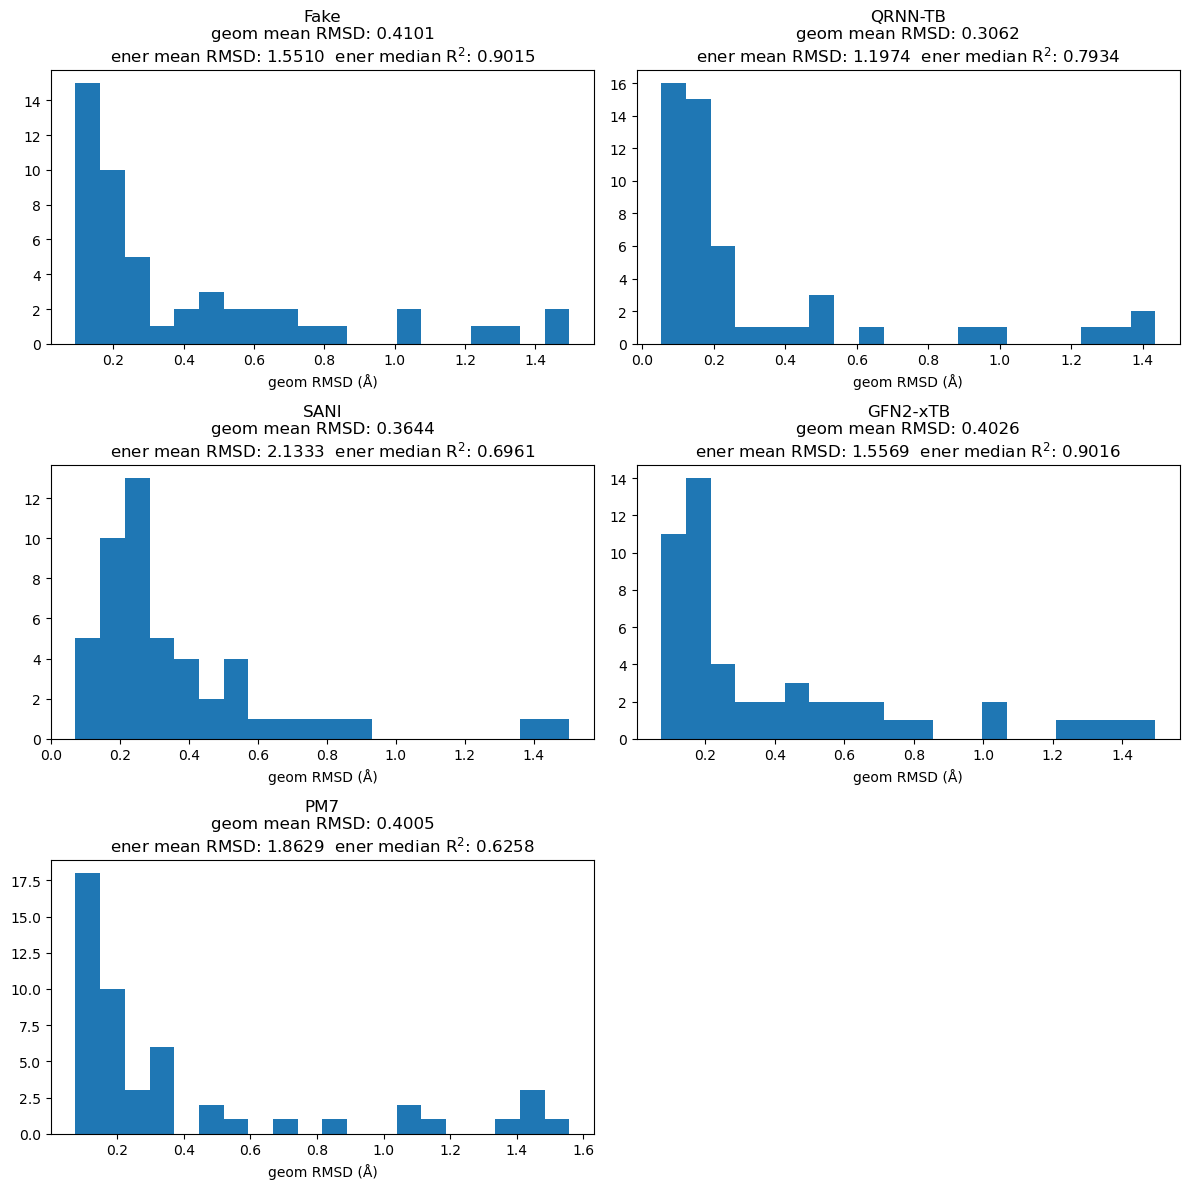

In [4]:
calc = XTB(method="GFN2-xTB")
ionic_conf = IonicConformer()
ionic_conf.opt_method = ionic_conf.OptMethod.ASE
ionic_conf.tasks = ionic_conf.tasks[:50]
ionic_conf.inference("Fake", calc, parallel=True)

ionic_conf.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7"])

  0%|          | 0/100 [00:00<?, ?it/s]/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/

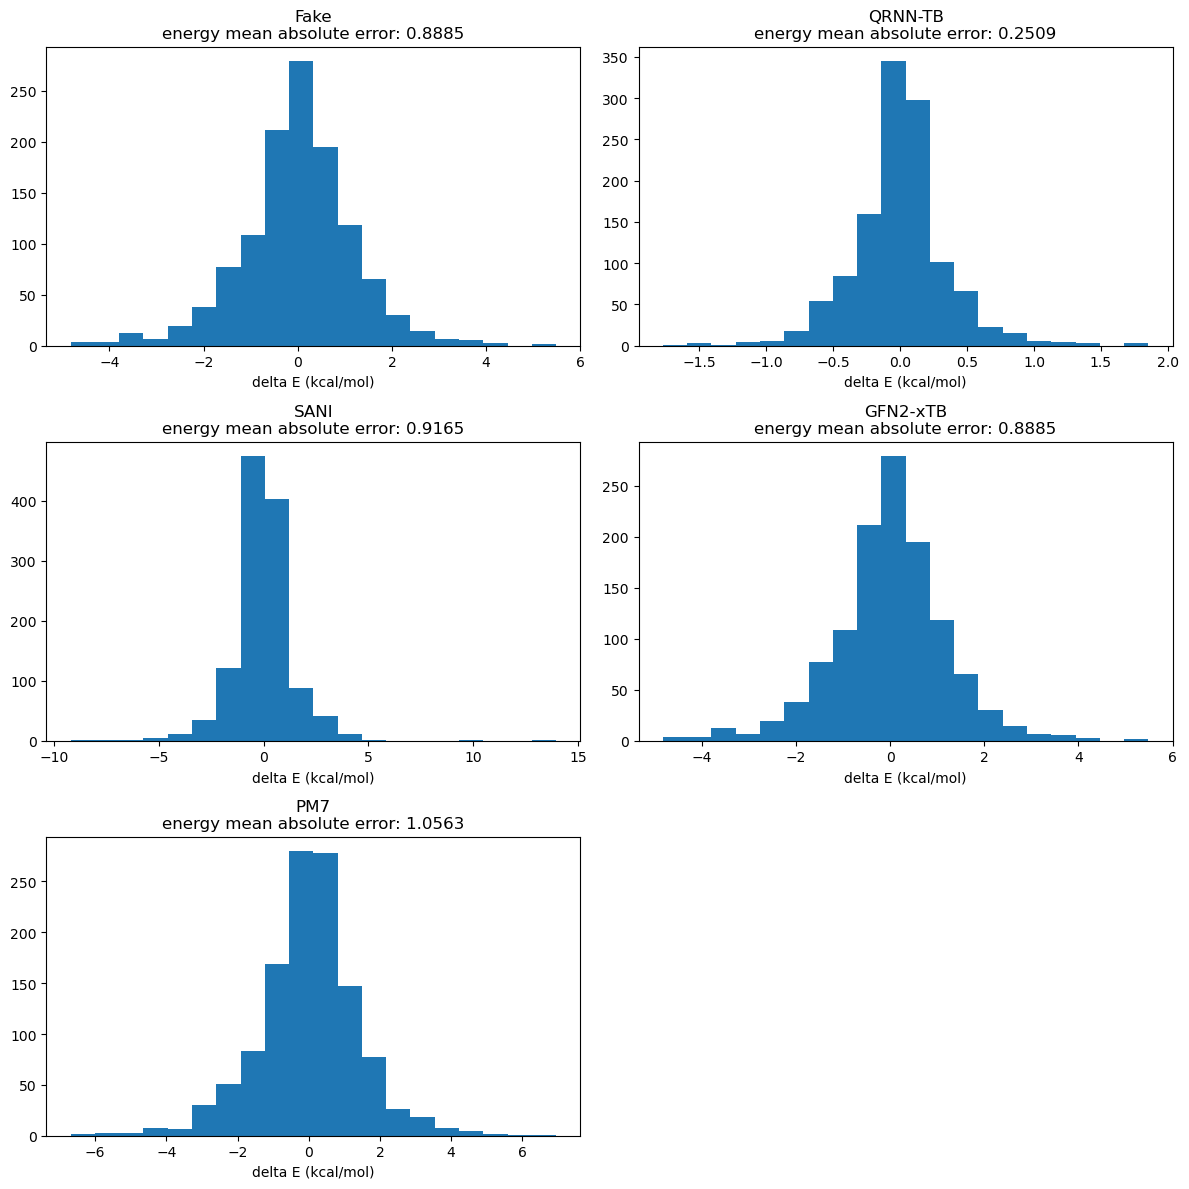

In [5]:
calc = XTB(method="GFN2-xTB")
rotamer = Rotamer()
rotamer.tasks = rotamer.tasks[:100]
rotamer.inference("Fake", calc, parallel=True)

rotamer.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7"])

  0%|          | 0/100 [00:00<?, ?it/s]/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/Users/xinyanwang/miniconda3/envs/dihscan/lib/python3.9/site-packages/geometric/internal.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def fast_dot(A, B):
/

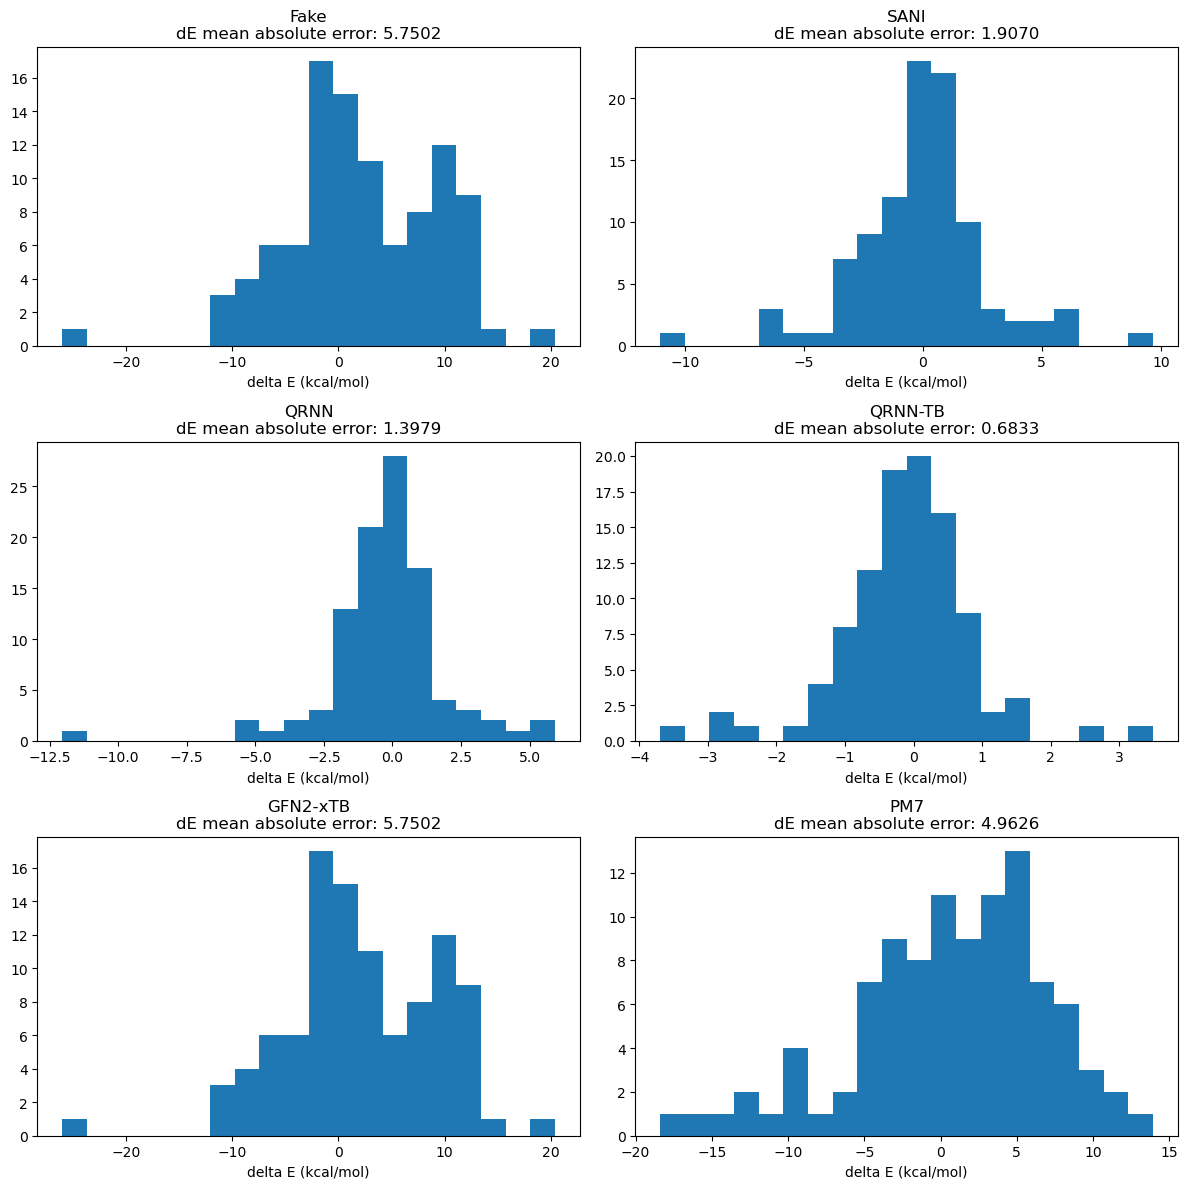

In [6]:
calc = XTB(method="GFN2-xTB")
tautomer = Tautomer()
tautomer.tasks = tautomer.tasks[:100]
tautomer.inference("Fake", calc, parallel=True)

tautomer.analyse(methods=["Fake", "SANI", "QRNN", "QRNN-TB", "GFN2-xTB", "PM7"])